# **Scope of the problem**

"In the context of financial markets, the problem is to forecast the future stock prices of a company based on historical(past) data. The dataset contains columns for 'Date,' 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' and 'Volume.' The objective is to develop an accurate time series forecasting model to predict future stock prices, facilitating investment decisions and risk management."

## **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company stock prices.xlsx to Company stock prices.xlsx


## **Reading the data**

In [3]:
data=pd.read_excel('Company stock prices.xlsx')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900


## **EDA**

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Here It shows that there are No Null Values in the DataSet

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,414.903107,421.117954,408.519270,414.796653,414.796653,7.060370e+06
std,135.039753,135.568500,134.016834,134.669664,134.669664,7.470407e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,311.570007,319.799988,308.850006,313.480011,313.480011,3.629200e+06
50%,418.399994,425.260010,411.880005,416.029999,416.029999,5.277700e+06
75%,519.900024,526.380005,513.789978,519.780029,519.780029,7.973300e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


## **Pairplot**
To Understand the best set of features to explain a relationship between Two Variables

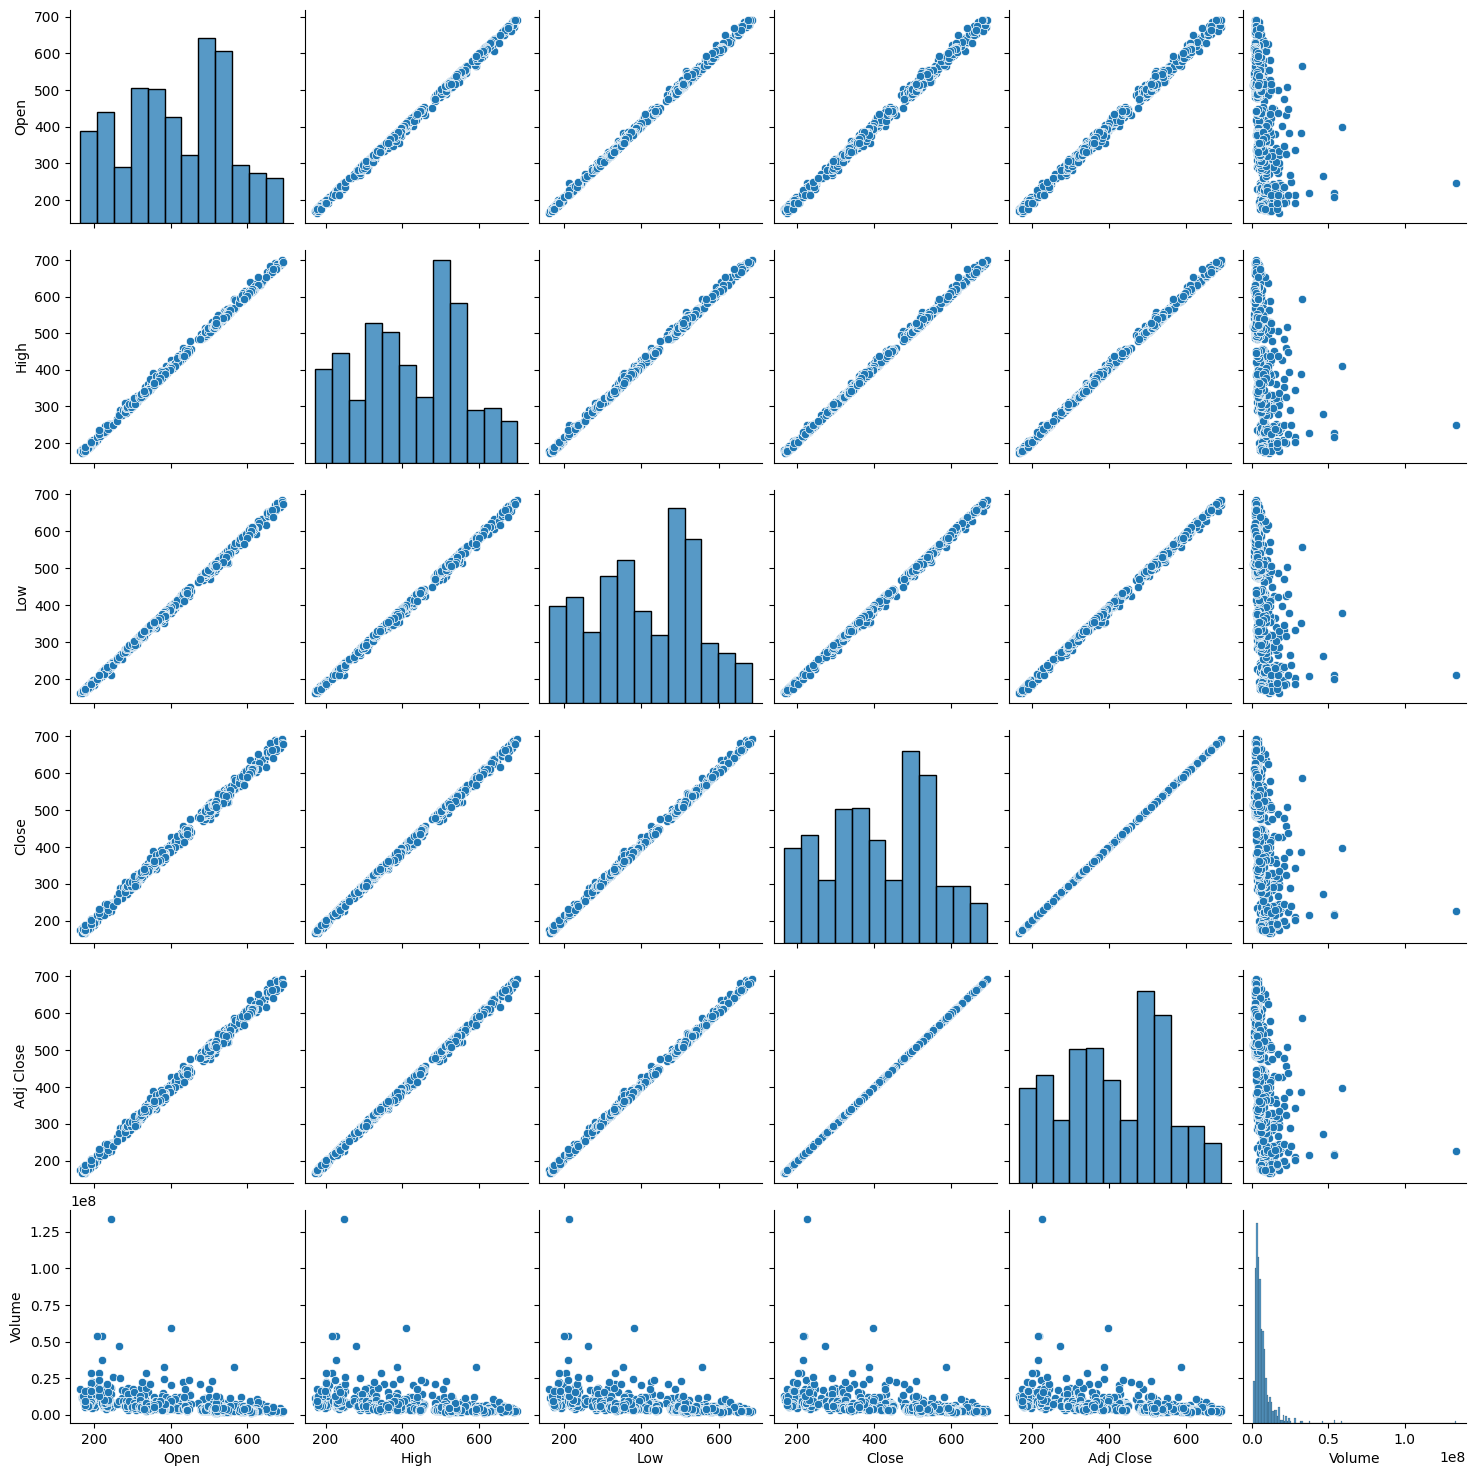

In [7]:
sns.pairplot(data)

#Observation - In this pairplots we can clearly observe that there is a colinearity between High, Open, Close, & Adj Close now we can reduce the features

# Lineplot

Using lineplot we can't understand the is it the data have any temporal trends or patterns

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


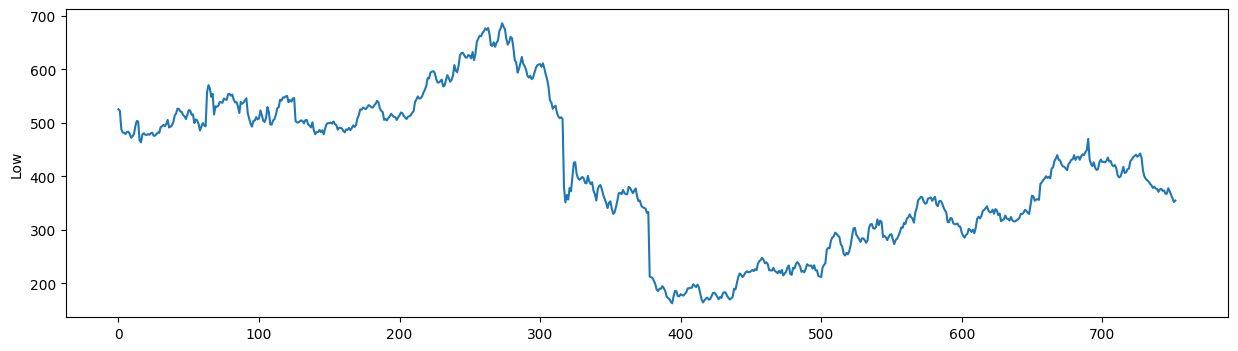

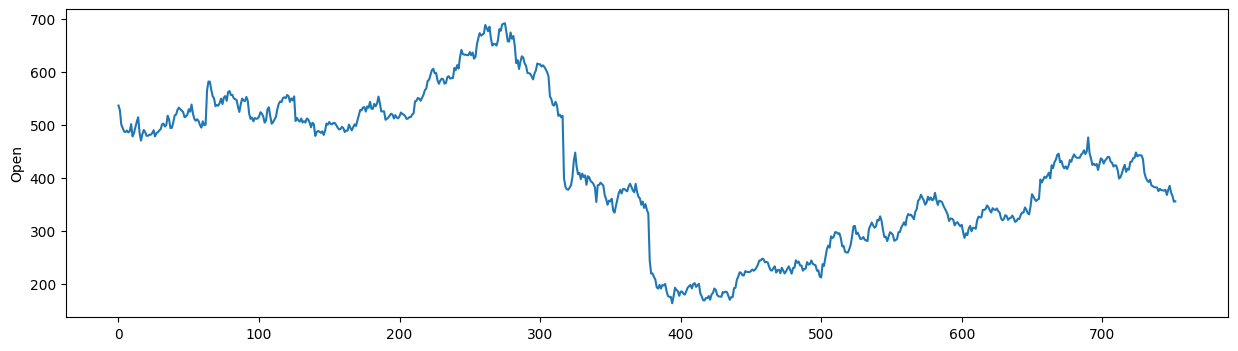

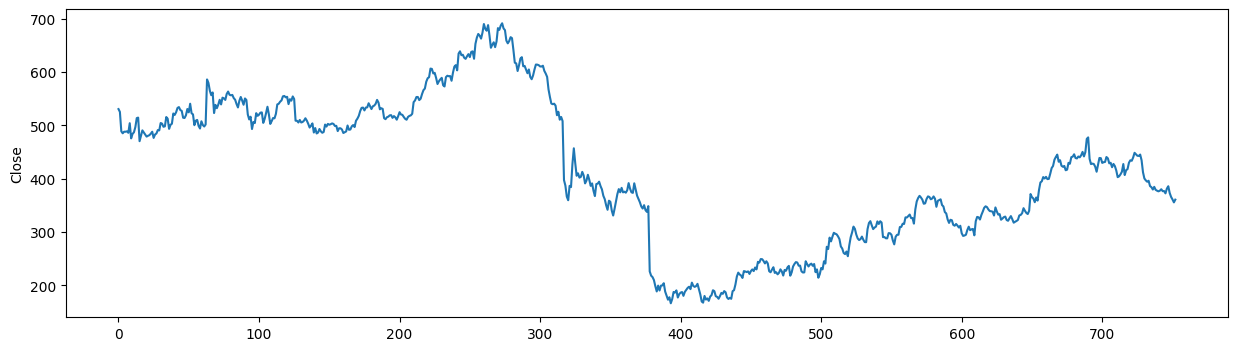

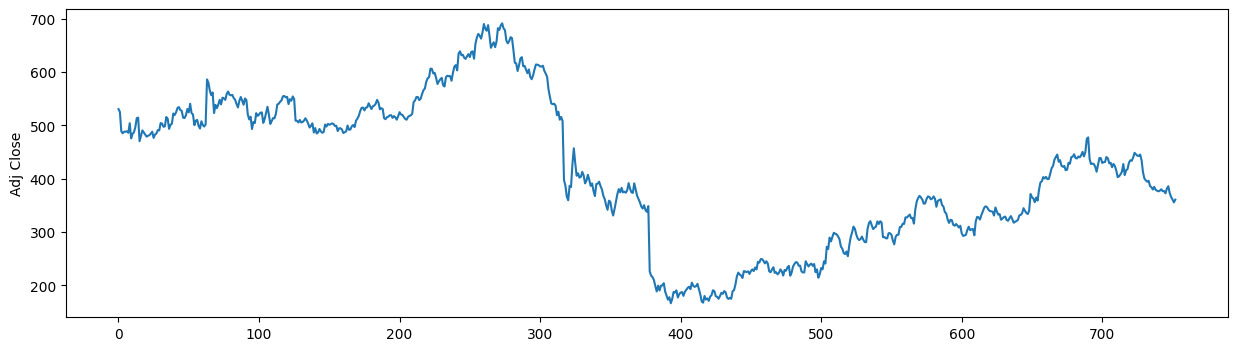

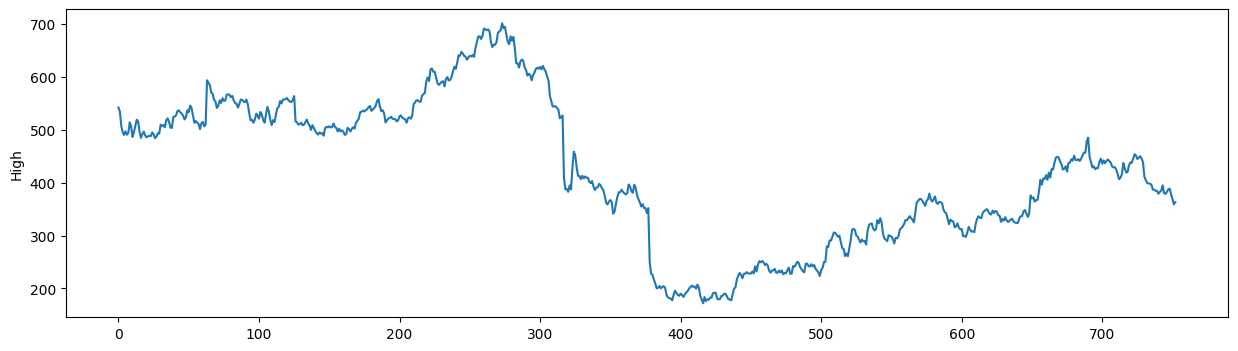

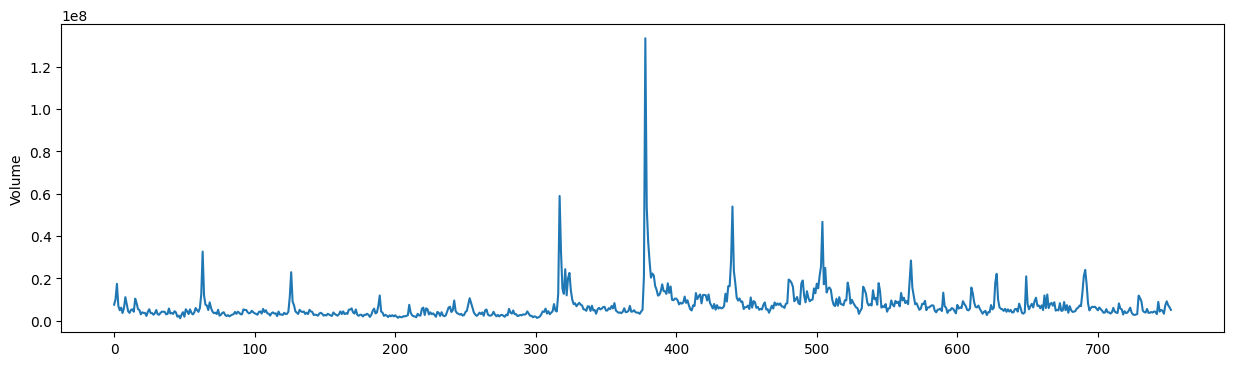

In [8]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure(figsize=(15,4))
  print(sns.lineplot(data[i]))


In here all of columns are simillar expect volume

### **Boxplot**

The boxplot is useful for understanding the central tendency and spread of the data,as well as any outliers

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


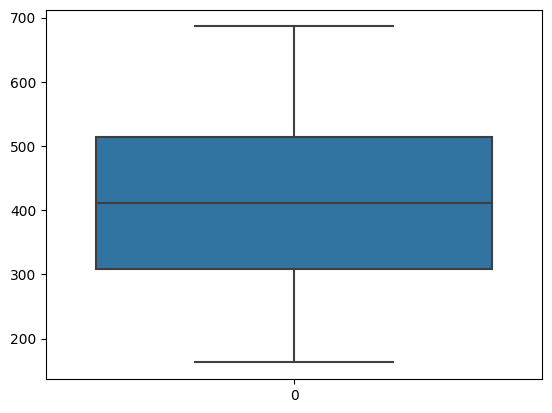

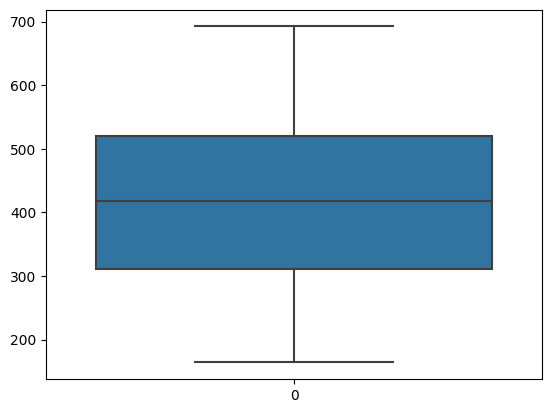

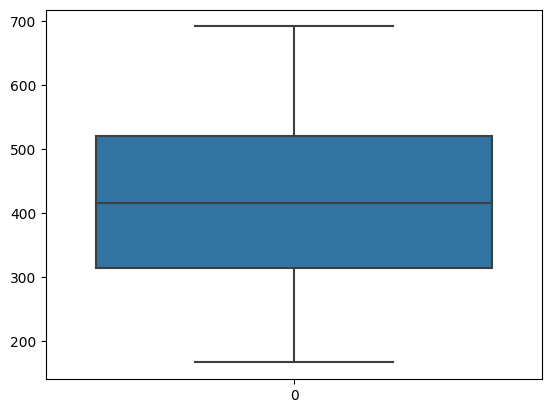

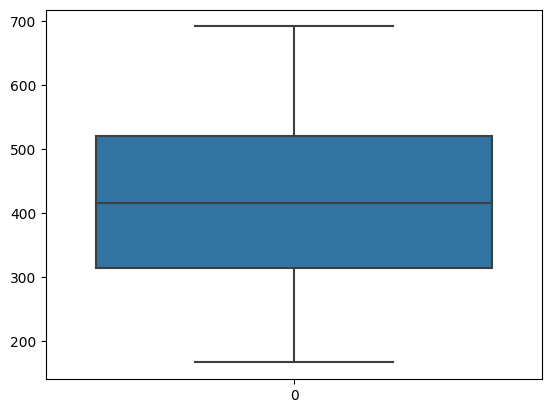

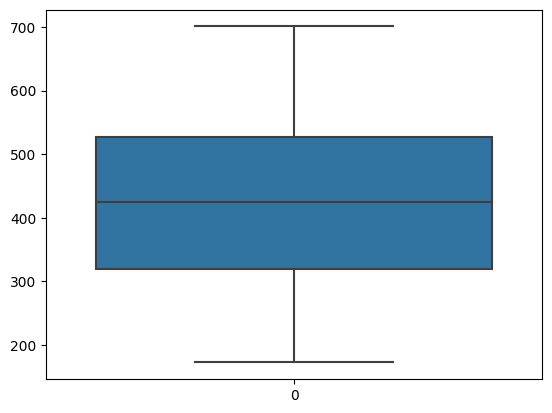

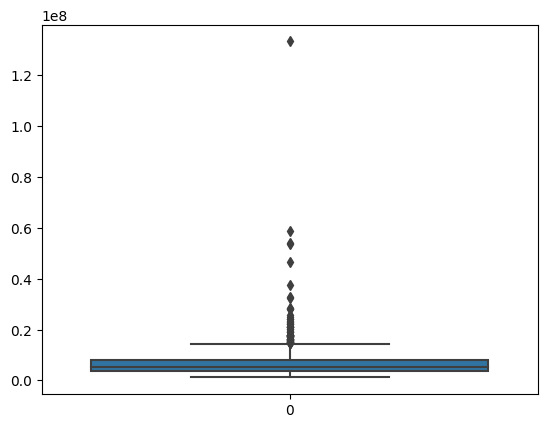

In [9]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure()
  print(sns.boxplot(data[i]))



Here we can observe that there are outliers in the volume boxplot

## **Distplot**

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


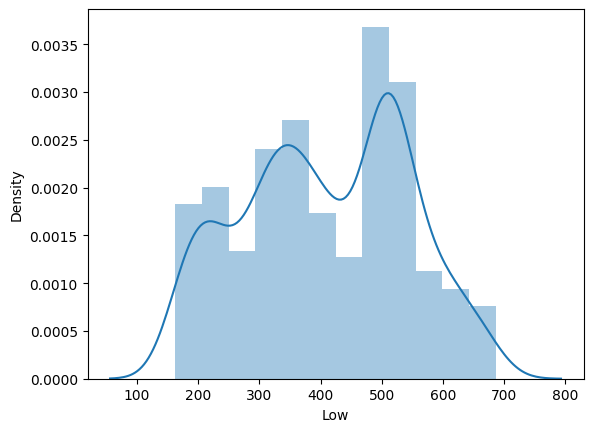

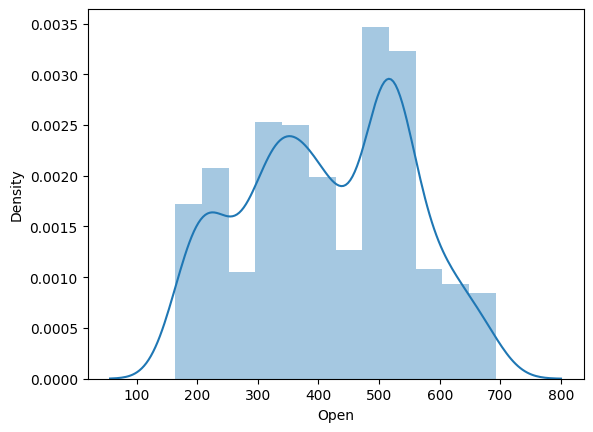

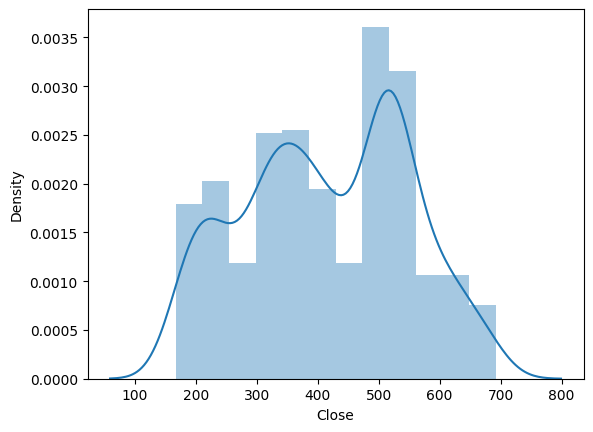

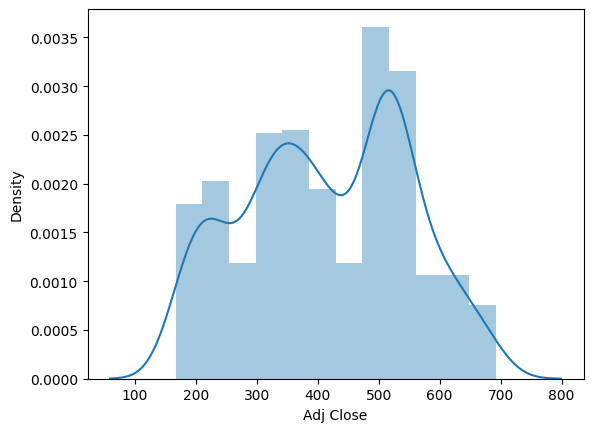

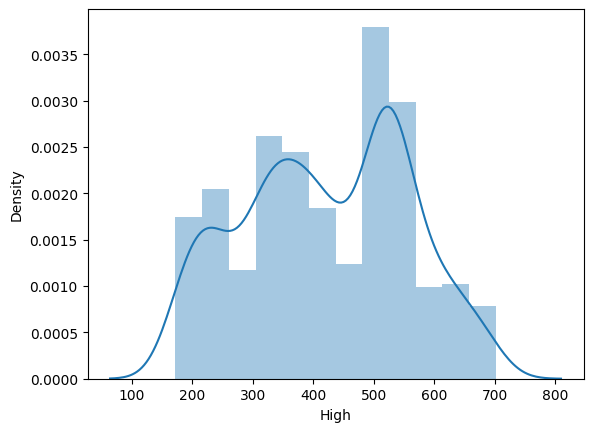

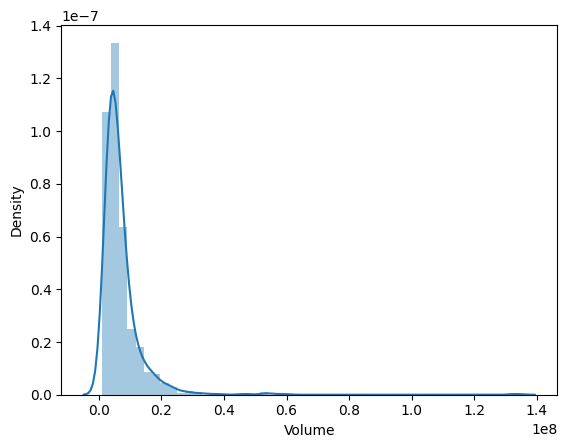

In [10]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure()
  print(sns.distplot(data[i]))

Here we can see two peaks in Open, High,Low, Close and Adj Close it is showing that stock prices are varied significantly in the follwing data.
In Volume data shows that it is Left skewed.

In [11]:
data=data.drop(columns=['Open','High','Low','Adj Close','Volume'])
data.head()

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999


We have droped unwanted columns to improve the accuracy

In [12]:
data

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [13]:
data1=data.copy()
data1.set_index('Date',inplace=True)

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are important tools in time series analysis and forecasting,The ACF plot shows the correlation between a time series and its lagged values at different time lags.ACF plots are useful for identifying the order of an autoregressive (AR) model. The PACF plot shows the partial correlation between a time series and its lagged values, controlling for the intermediate lags. It is useful for identifying the order of a moving average (MA) model. The combined use of ACF and PACF plots can help in determining appropriate orders for time series models like AR, MA, and ARMA, which are essential for forecasting future values and analyzing the underlying patterns in the data

# AFC(Auto Correlation Function)

In [14]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
acf_values=acf(data['Close'])
np.round(acf_values,2)

array([1.  , 1.  , 0.99, 0.99, 0.98, 0.98, 0.97, 0.97, 0.97, 0.96, 0.96,
       0.96, 0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.92, 0.92, 0.91, 0.91,
       0.9 , 0.9 , 0.89, 0.89, 0.89, 0.88, 0.88])

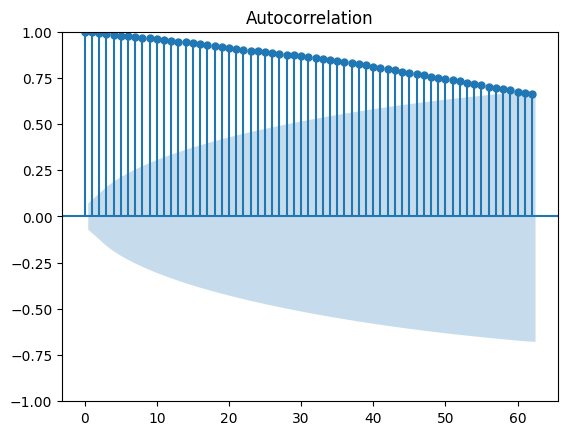

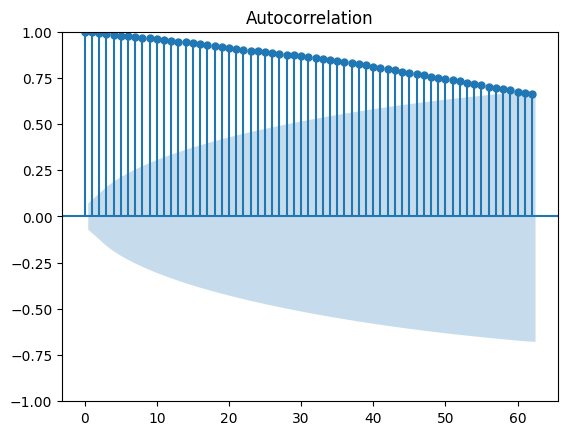

In [16]:
plot_acf(data['Close'],lags=62)

Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .



## **PACF(Partial AutoCorrelation Function)**

In [17]:
pacf_values=pacf(data['Close'])
np.round(pacf_values,2)

array([ 1.  ,  1.  , -0.03,  0.08, -0.02,  0.03,  0.03,  0.03,  0.01,
       -0.06, -0.02, -0.03, -0.03, -0.06, -0.08, -0.08,  0.08, -0.03,
        0.07, -0.07, -0.02, -0.02,  0.04,  0.07,  0.06,  0.01,  0.04,
       -0.01, -0.06])

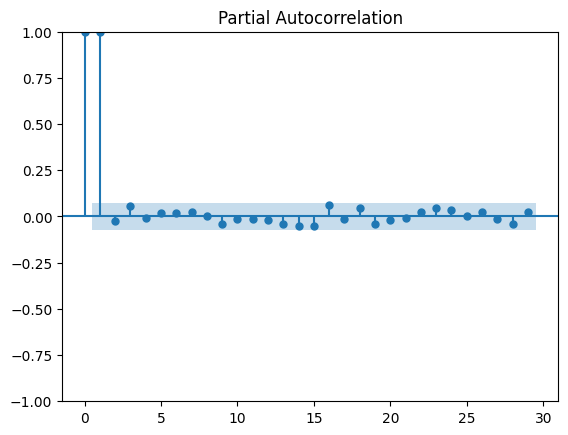

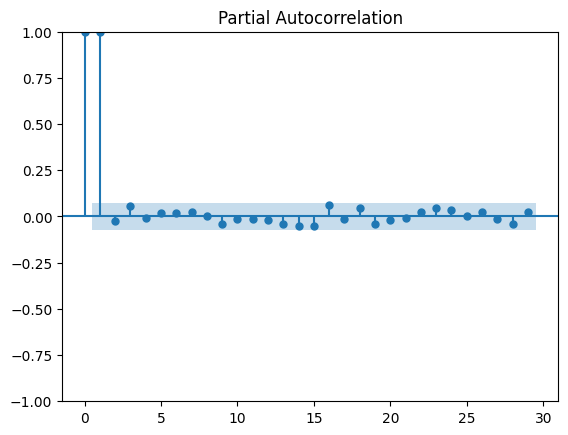

In [18]:
plot_pacf(data['Close'])

# **Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .**

# **Conversion of Non Stationary data into Stationary Data**

In [19]:
data1=data1.diff(1).dropna()
#  we convert the non stationary data into stationary data to get more accuracy

In [20]:
from statsmodels.tsa.stattools import adfuller
model=adfuller(data1,autolag='AIC')

In [21]:
print('ADF sTATITCS :',model[0])
print('P-Value :',model[1])
print('Critical Value :',model[3])

ADF sTATITCS : -26.634566685567464
P-Value : 0.0
Critical Value : 751


In [22]:
if model[1]<0.05:
  print('Data is Stationery')
else:
  print('Data is not Stationery')

Data is Stationery


<Axes: xlabel='Date'>

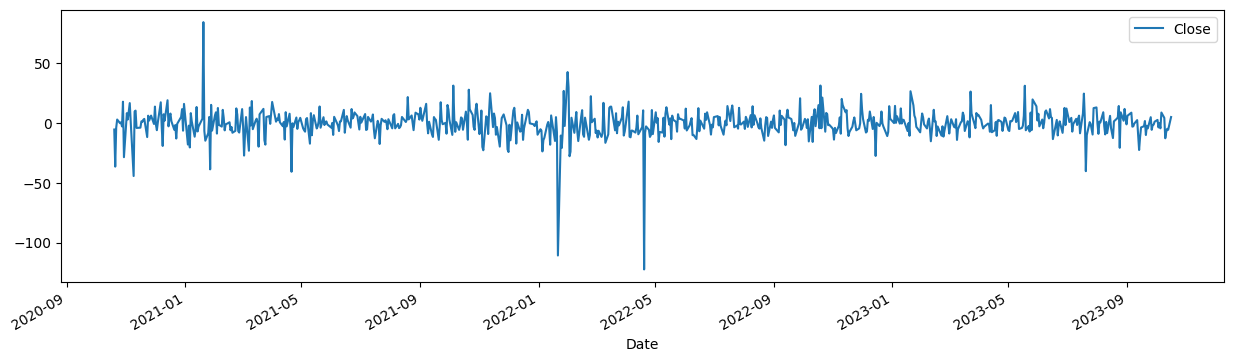

In [23]:
data1.plot(figsize=(15,4))

In [24]:
data1

,Close
Date,
2020-10-20,-5.299988
2020-10-21,-36.369995
2020-10-22,-3.819977
2020-10-23,3.049988
2020-10-26,-0.040009
...,...
2023-10-10,-12.630005
2023-10-11,-7.390014
2023-10-12,-4.729981


In [25]:
data['Date']=pd.to_datetime(data.Date,format='%b-%y')
data['month']=data.Date.dt.strftime('%b')# month extraction
data['year']=data.Date.dt.strftime('%Y')#year extraction
data.head()

,Date,Close,month,year
0,2020-10-19,530.719971,Oct,2020
1,2020-10-20,525.419983,Oct,2020
2,2020-10-21,489.049988,Oct,2020
3,2020-10-22,485.230011,Oct,2020
4,2020-10-23,488.279999,Oct,2020


In [26]:
data.isna().sum()

Date     0
Close    0
month    0
year     0
dtype: int64

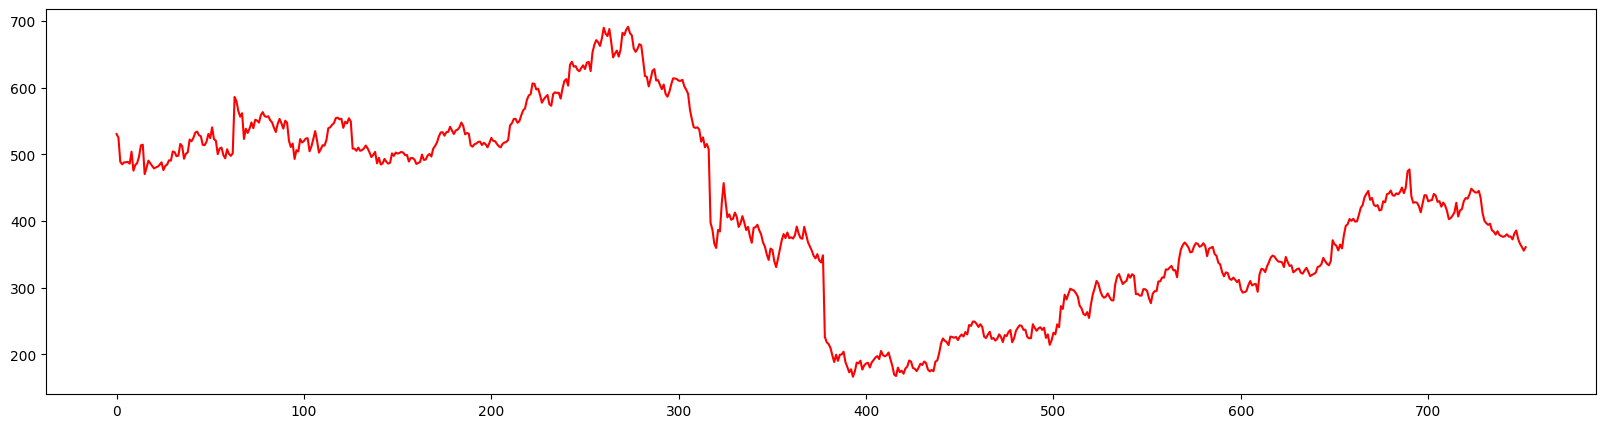

In [27]:
data['Close'].plot(figsize=(20,5),color='red')
plt.show()

<Axes: xlabel='month', ylabel='year'>

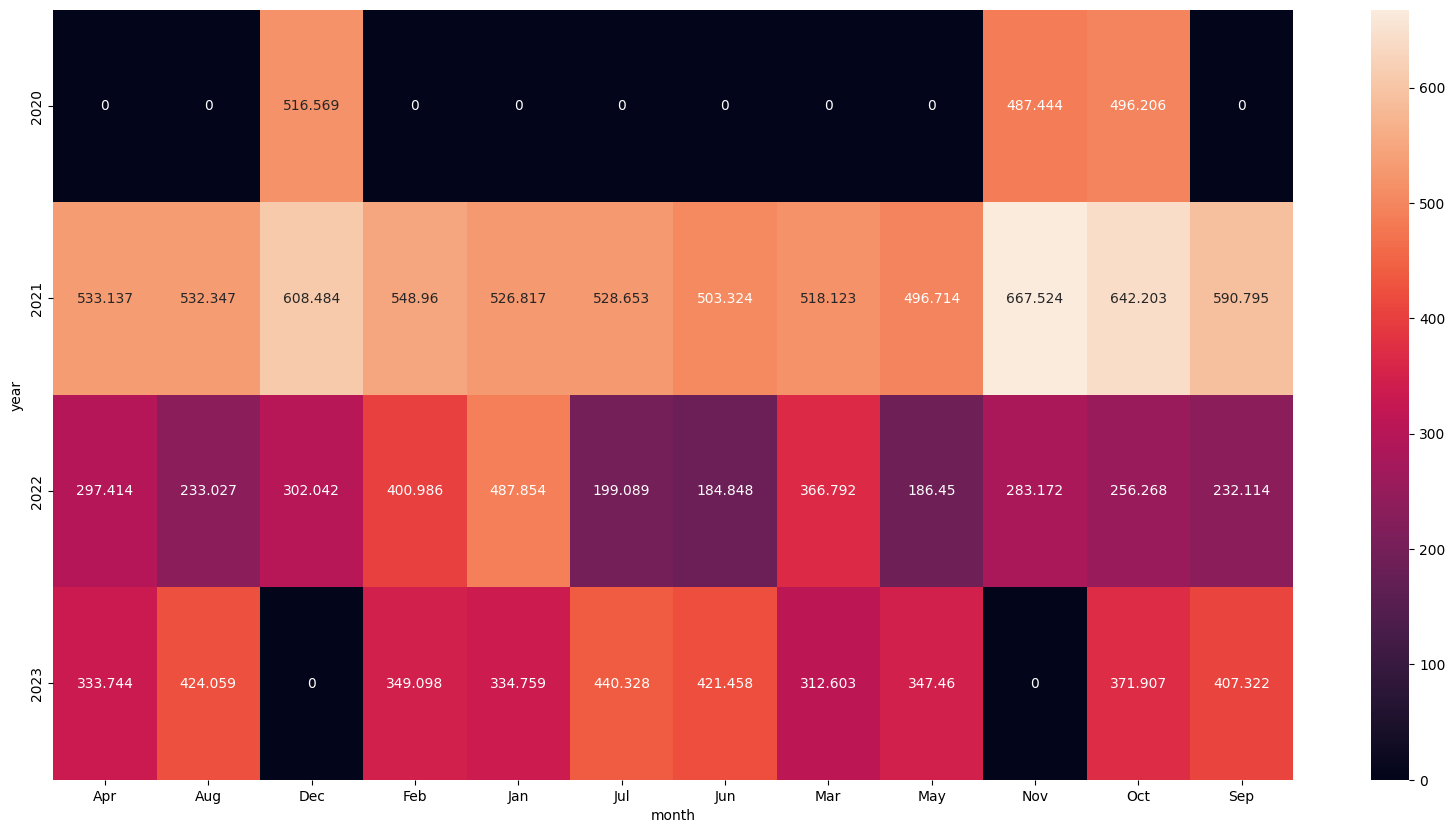

In [28]:
plt.figure(figsize=(20,10))
pivot_table= pd.pivot_table(data=data,values='Close',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='g')

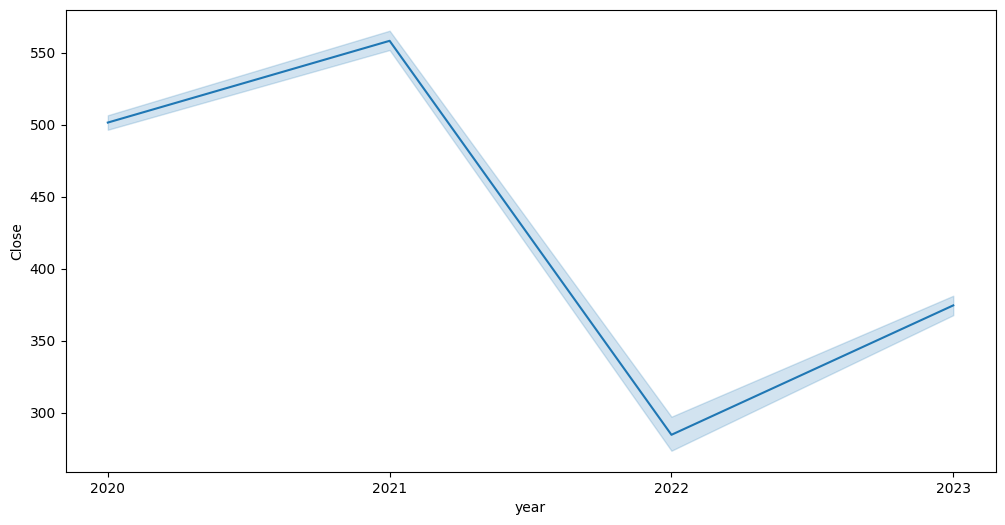

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Close',data=data)
plt.show()

Lineplot can display the relationship between two variables

In [30]:
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
data1=pd.concat([data,month_dummies],axis=1)
data1.head()

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2020-10-19,530.719971,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0
1,2020-10-20,525.419983,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0
2,2020-10-21,489.049988,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0
3,2020-10-22,485.230011,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0
4,2020-10-23,488.279999,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
data1['t']=np.arange(1,754)
data1['t_squared']=(data1['t'])**2
data1['Log_Close']=np.log(data1['Close'])
data1.head()

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,5,25,6.190889


In [32]:
data1

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,5,25,6.190889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-10,373.320007,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,749,561001,5.922436
749,2023-10-11,365.929993,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,750,562500,5.902442
750,2023-10-12,361.200012,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,751,564001,5.889432
751,2023-10-13,355.679993,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,752,565504,5.874031


In [33]:
Train=data1[:600]
Test=data1[600:]

# Linear Model

In [34]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Close~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_linear))**2))
print('rmse_linear :',rmse_linear)

rmse_linear : 204.18006783566565


# Exponential Model

In [35]:
exp_model=smf.ols('Log_Close~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Log_Close'])-np.array(pred_exp))**2))
print('rmse_exp :',rmse_exp)

rmse_exp : 0.6121371793783966


# Quadrative model

In [36]:
quad_model=smf.ols('Close~t+t_squared',data=Train).fit()
pred_quad=pd.Series(quad_model.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_quad=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_quad))**2))
print("rmse_quad :",rmse_quad)


rmse_quad : 299.08156147582724


# Additive Seasonality Model

In [37]:
add_sea = smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea))**2))
print('rmse_add :',rmse_add)

rmse_add : 70.17763831673336


# Additive Seasonality QT

In [38]:
add_sea_quad = smf.ols('Close~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(add_sea_quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_asq=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_model))**2))
print("rmse_asq :",rmse_asq)

rmse_asq : 471.1780621992185


# Multi Seasonality

In [39]:
mul_sea=smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ms=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_model))**2))
print("rmse_mulsea :",rmse_ms)

rmse_mulsea : 70.17763831673336


In [40]:
data2=pd.DataFrame({'Models':['Linear','Exponential','Quadrative Model','Additive Seasonality','Additive Seasonality QT','Multi Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_asq,rmse_ms]})
data2

,Models,Values
0,Linear,204.180068
1,Exponential,0.612137
2,Quadrative Model,299.081561
3,Additive Seasonality,70.177638
4,Additive Seasonality QT,471.178062
5,Multi Seasonality,70.177638


In [41]:
data2.sort_values('Values')

,Models,Values
1,Exponential,0.612137
3,Additive Seasonality,70.177638
5,Multi Seasonality,70.177638
0,Linear,204.180068
2,Quadrative Model,299.081561
4,Additive Seasonality QT,471.178062


# LSTM

In [42]:
!pip install tensorflow

In [43]:
!pip install scikeras

In [44]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [45]:
data1

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,0,0,0,0,0,0,0,0,0,0,1,0,5,25,6.190889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-10,373.320007,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,749,561001,5.922436
749,2023-10-11,365.929993,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,750,562500,5.902442
750,2023-10-12,361.200012,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,751,564001,5.889432
751,2023-10-13,355.679993,Oct,2023,0,0,0,0,0,0,0,0,0,0,1,0,752,565504,5.874031


In [46]:
data1['Date']=pd.to_numeric(data1['Date'])

In [47]:
data1=pd.get_dummies(data1['month'])

In [48]:
data3=data.copy()
data3.drop(['month','year'],axis=1,inplace=True)

In [49]:
data3.head(2)

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983


In [50]:
data3['Date']=pd.to_datetime(data3['Date'])
data3.set_index('Date',inplace=True)
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(data3[['Close']])

In [51]:
def create_sequences(data,order_length):
  sequences=[]
  targets=[]
  for i in range(len(data)-order_length):
    seq=data[i:i+order_length]
    target=data[i+order_length]
    sequences.append(seq)
    targets.append(target)
  return np.array(sequences),np.array(targets)

In [52]:
order_length=4
x,y=create_sequences(df_scaled,order_length)
train_size=int(len(x) * 0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test= x_test.reshape((x_test.shape[0],x_test.shape[1],1))


In [53]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(order_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2)
y_pred = model.predict(x_test)

# Invert predictions and targets to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
38/38 - 2s - loss: 0.1727 - 2s/epoch - 49ms/step
Epoch 2/50
38/38 - 0s - loss: 0.0222 - 154ms/epoch - 4ms/step
Epoch 3/50
38/38 - 0s - loss: 0.0014 - 139ms/epoch - 4ms/step
Epoch 4/50
38/38 - 0s - loss: 0.0011 - 158ms/epoch - 4ms/step
Epoch 5/50
38/38 - 0s - loss: 0.0011 - 158ms/epoch - 4ms/step
Epoch 6/50
38/38 - 0s - loss: 0.0010 - 147ms/epoch - 4ms/step
Epoch 7/50
38/38 - 0s - loss: 0.0010 - 143ms/epoch - 4ms/step
Epoch 8/50
38/38 - 0s - loss: 0.0010 - 146ms/epoch - 4ms/step
Epoch 9/50
38/38 - 0s - loss: 0.0010 - 159ms/epoch - 4ms/step
Epoch 10/50
38/38 - 0s - loss: 0.0010 - 151ms/epoch - 4ms/step
Epoch 11/50
38/38 - 0s - loss: 0.0011 - 149ms/epoch - 4ms/step
Epoch 12/50
38/38 - 0s - loss: 0.0010 - 160ms/epoch - 4ms/step
Epoch 13/50
38/38 - 0s - loss: 9.9607e-04 - 156ms/epoch - 4ms/step
Epoch 14/50
38/38 - 0s - loss: 0.0010 - 143ms/epoch - 4ms/step
Epoch 15/50
38/38 - 0s - loss: 9.8638e-04 - 169ms/epoch - 4ms/step
Epoch 16/50
38/38 - 0s - loss: 9.7106e-04 - 150ms/epoch - 

In [54]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9.97087678727713


In [55]:
future_data=df_scaled[-order_length:].reshape((1,order_length,1))
forecast=[]

for i in range(365):
  prediction=model.predict(future_data)
  forecast.append(prediction[0,0])
  future_data=np.append(future_data[:, 1:, :],prediction.reshape(1, 1, 1),axis=1)
  forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
  last_date=data3.index.max()
  forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')


1/1 [==============================] - 0s 23ms/step


In [56]:
forecast_df=pd.DataFrame({'Date': forecast_dates, 'Close': forecast_inv.flatten()})
print(forecast_df)

          Date       Close
0   2023-10-17  359.371277
1   2023-10-18  359.695221
2   2023-10-19  359.774078
3   2023-10-20  359.930878
4   2023-10-21  360.023743
..         ...         ...
360 2024-10-11  407.701660
361 2024-10-12  407.779114
362 2024-10-13  407.856140
363 2024-10-14  407.932678
364 2024-10-15  408.008759

[365 rows x 2 columns]


In [57]:
data3.reset_index('Date',inplace=True)

In [58]:
data3

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [59]:
merged_data=pd.concat([data3,forecast_df],ignore_index=True)

In [60]:
merged_data

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
1113,2024-10-11,407.701660
1114,2024-10-12,407.779114
1115,2024-10-13,407.856140
1116,2024-10-14,407.932678


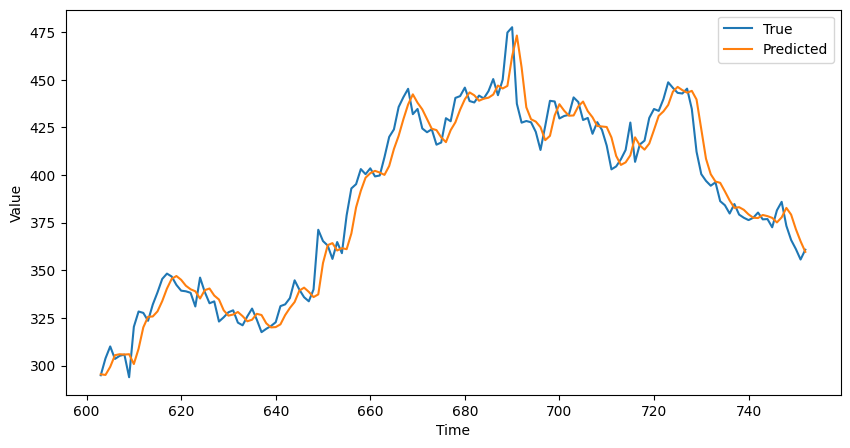

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data.index[-len(y_test):],y_test_inv,label='True')
plt.plot(data.index[-len(y_test):],y_pred_inv,label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [62]:
merged_data.to_csv(r'C:\Users\arunn\OneDrive\Desktop\New folder\mereged_data.csv')

### **SVR**

In [63]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [64]:
svr=data3['Close'].values.reshape(-1,1)

In [65]:
scaler=MinMaxScaler()
svr_scaled=scaler.fit_transform(svr)

In [66]:
train_size = int(len(svr_scaled) * 0.8)
train_data, test_data = svr_scaled[:train_size], svr_scaled[train_size:]

In [67]:
# Determine the value of the kernel and other hyperparameters.
# Kernel options: 'linear', 'poly', 'rbf', 'sigmoid', etc.
kernel = 'rbf'
C = 1.0  # Regularization parameter
epsilon = 0.1  # Epsilon parameter in the epsilon-insensitive loss function

In [68]:
svr_model = SVR(kernel=kernel, C=C, epsilon=epsilon)

In [69]:
X_train, y_train = train_data[:-1], train_data[1:]  # Use lagged values as features
svr_model.fit(X_train, y_train.ravel())

SVR()

In [70]:
X_test, y_test = test_data[:-1], test_data[1:]  # Use lagged values as features
y_pred = svr_model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.0011511460803977328


In [72]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_svr)

RMSE: 0.03392854374118837


In [73]:
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test)

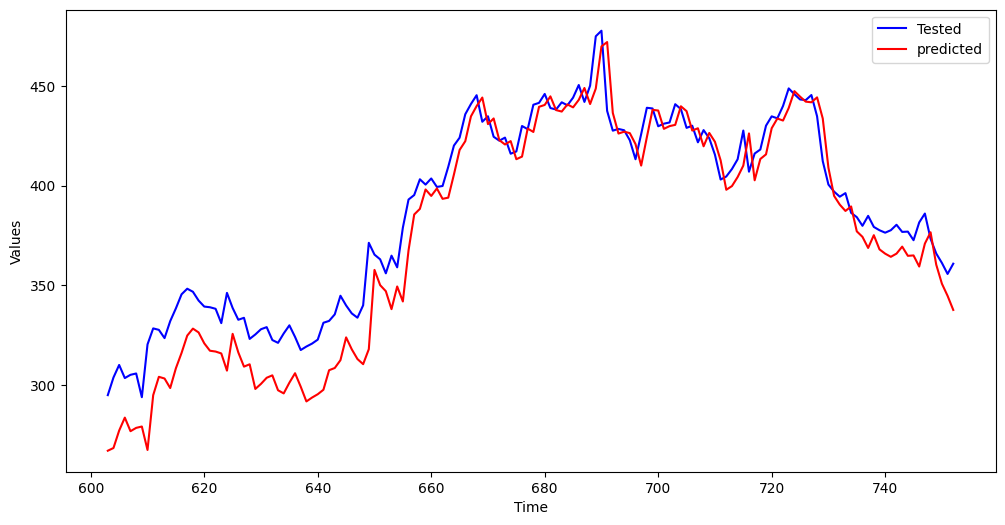

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(data3.index[train_size+1:], y_test_inverse, label='Tested', color='blue')
plt.plot(data3.index[train_size+1:], y_pred_inverse, label='predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()